In [118]:
import quandl as qu
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [119]:
#Use Pandas to populate the data frame
dataframe = qu.get("WIKI/AMZN",api_key='tJbUksb_TeZXtwAgDeia')
dataframe = dataframe[['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio', 'Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
print(dataframe)

               Open     High      Low    Close     Volume  Ex-Dividend  \
Date                                                                     
1997-05-16    22.38    23.75    20.50    20.75  1225000.0          0.0   
1997-05-19    20.50    21.25    19.50    20.50   508900.0          0.0   
1997-05-20    20.75    21.00    19.63    19.63   455600.0          0.0   
1997-05-21    19.25    19.75    16.50    17.13  1571100.0          0.0   
1997-05-22    17.25    17.38    15.75    16.75   981400.0          0.0   
...             ...      ...      ...      ...        ...          ...   
2018-03-21  1586.45  1590.00  1563.17  1581.86  4667291.0          0.0   
2018-03-22  1565.47  1573.85  1542.40  1544.10  6177737.0          0.0   
2018-03-23  1539.01  1549.02  1495.36  1495.56  7843966.0          0.0   
2018-03-26  1530.00  1556.99  1499.25  1555.86  5547618.0          0.0   
2018-03-27  1572.40  1575.96  1482.32  1497.05  6793279.0          0.0   

            Split Ratio    Adj. Open 

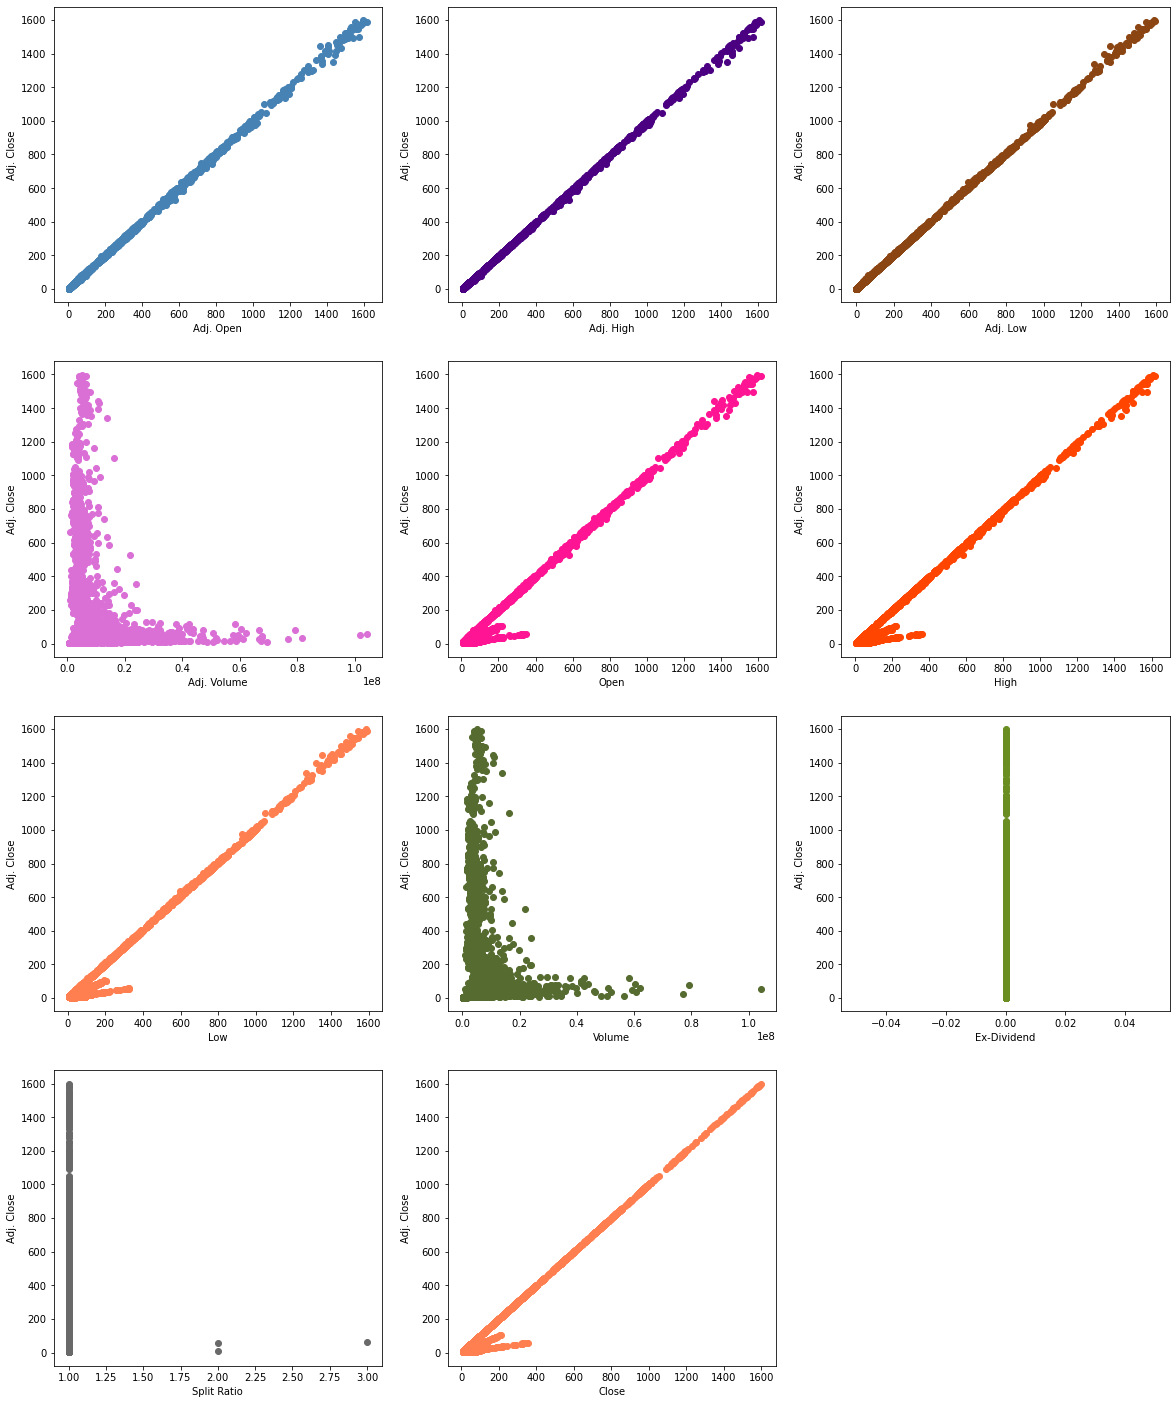

In [120]:
figure_size = (20,25)
plt.figure( figsize = figure_size )

plt.subplot(4,3,1)
plt.scatter( dataframe['Adj. Open'], dataframe['Adj. Close'],color = 'steelblue' )
plt.xlabel("Adj. Open")
plt.ylabel("Adj. Close")

plt.subplot(4,3,2)
plt.scatter( dataframe['Adj. High'], dataframe['Adj. Close'],color = 'indigo')
plt.xlabel("Adj. High")
plt.ylabel("Adj. Close")

plt.subplot(4,3,3)
plt.scatter( dataframe['Adj. Low'], dataframe['Adj. Close'],color = 'saddlebrown' )
plt.xlabel("Adj. Low")
plt.ylabel("Adj. Close")

plt.subplot(4,3,4)
plt.scatter( dataframe['Adj. Volume'], dataframe['Adj. Close'],color = 'orchid')
plt.xlabel("Adj. Volume")
plt.ylabel("Adj. Close")

plt.subplot(4,3,5)
plt.scatter( dataframe['Open'], dataframe['Adj. Close'],color = 'deeppink')
plt.xlabel("Open")
plt.ylabel("Adj. Close")

plt.subplot(4,3,6)
plt.scatter( dataframe['High'], dataframe['Adj. Close'],color = 'orangered')
plt.xlabel("High")
plt.ylabel("Adj. Close") 

plt.subplot(4,3,7)
plt.scatter( dataframe['Low'], dataframe['Adj. Close'],color = 'coral')
plt.xlabel("Low")
plt.ylabel("Adj. Close") 

plt.subplot(4,3,8)
plt.scatter( dataframe['Volume'], dataframe['Adj. Close'],color = 'darkolivegreen')
plt.xlabel("Volume")
plt.ylabel("Adj. Close") 

plt.subplot(4,3,9)
plt.scatter( dataframe['Ex-Dividend'], dataframe['Adj. Close'],color = 'olivedrab')
plt.xlabel("Ex-Dividend")
plt.ylabel("Adj. Close") 

plt.subplot(4,3,10)
plt.scatter( dataframe['Split Ratio'], dataframe['Adj. Close'],color = 'dimgrey')
plt.xlabel("Split Ratio")
plt.ylabel("Adj. Close")

plt.subplot(4,3,11)
plt.scatter( dataframe['Close'], dataframe['Adj. Close'],color = 'coral')
plt.xlabel("Close")
plt.ylabel("Adj. Close") 


plt.show()

In [121]:
# Create X label
X = np.array(dataframe.drop(['Adj. Close'], 1))
print(X)
# Create Y label
Y = np.array(dataframe.drop(['Open', 'High', 'Low', 'Close',  'Ex-Dividend', 'Split Ratio','Adj. Open',  'Adj. High',  'Adj. Low'], 1))
print(Y)

[[2.23800000e+01 2.37500000e+01 2.05000000e+01 ... 1.97916667e+00
  1.70833333e+00 1.47000000e+07]
 [2.05000000e+01 2.12500000e+01 1.95000000e+01 ... 1.77083333e+00
  1.62500000e+00 6.10680000e+06]
 [2.07500000e+01 2.10000000e+01 1.96300000e+01 ... 1.75000000e+00
  1.63583333e+00 5.46720000e+06]
 ...
 [1.53901000e+03 1.54902000e+03 1.49536000e+03 ... 1.54902000e+03
  1.49536000e+03 7.84396600e+06]
 [1.53000000e+03 1.55699000e+03 1.49925000e+03 ... 1.55699000e+03
  1.49925000e+03 5.54761800e+06]
 [1.57240000e+03 1.57596000e+03 1.48232000e+03 ... 1.57596000e+03
  1.48232000e+03 6.79327900e+06]]
[[1.22500000e+06 1.72916667e+00 1.47000000e+07]
 [5.08900000e+05 1.70833333e+00 6.10680000e+06]
 [4.55600000e+05 1.63583333e+00 5.46720000e+06]
 ...
 [7.84396600e+06 1.49556000e+03 7.84396600e+06]
 [5.54761800e+06 1.55586000e+03 5.54761800e+06]
 [6.79327900e+06 1.49705000e+03 6.79327900e+06]]


In [122]:
'''
Select algorithm based on data analysis
- Split training and testing data
- we will be using Linear regression as regression problem
- Tranining data 70%
- Testing data 30%
'''

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3 )
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(3673, 11) (3673, 3)
(1575, 11) (1575, 3)


In [123]:
# Apply Linear Regression
reg = LinearRegression()
model = reg.fit(X_train, Y_train)

In [124]:
#get linear regression coefficients
slope = reg.coef_[0]
intercept = reg.intercept_
print("Slope : {}, Intercept : {}".format(slope, intercept))

Slope : [-9.89405725e-11 -2.48496224e-10  4.71084789e-10 -9.58640099e-11
  1.00000000e+00  0.00000000e+00 -1.27573869e-09 -1.10239507e-10
  6.08963901e-11  2.77069513e-11 -1.66533454e-16], Intercept : [-3.72529030e-09  5.13881507e-01 -9.31322575e-10]


In [125]:
predicted_stock_train = np.zeros(Y_train.shape)
for i in range(len((X_train))):
    predicted_stock_train[i] = (slope[0] * X_train[i][0]) + (slope[1] * X_train[i][1]) + (slope[2] * X_train[i][2]) + (slope[3] * X_train[i][3]) + (slope[4] * X_train[i][4]) + (slope[5] * X_train[i][5]) + (slope[6] * X_train[i][6]) + (slope[7] * X_train[i][7]) + (slope[8] * X_train[i][8])  + intercept
print("predicted training data : {}".format(predicted_stock_train))


predicted training data : [[8001000.         8001000.51388151 8001000.00000001]
 [9602500.         9602500.51388151 9602500.00000001]
 [1553996.99999997 1553997.51388148 1553996.99999997]
 ...
 [4785500.         4785500.51388151 4785500.        ]
 [9746000.         9746000.51388151 9746000.        ]
 [7698100.         7698100.51388151 7698100.00000001]]


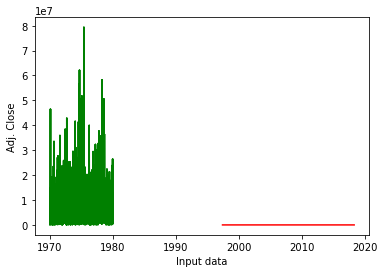

In [126]:
plt.plot(predicted_stock_train, color = 'green')
plt.xlabel('Input data')
plt.ylabel('Adj. Close')
plt.plot(dataframe['Adj. Close'],color = "red")
plt.show()

In [127]:
predicted_stock_test = np.zeros(Y_test.shape)
for i in range(len((X_test))):
    predicted_stock_test[i] = (slope[0] * X_test[i][0]) + (slope[1] * X_test[i][1]) + (slope[2] * X_test[i][2]) + (slope[3] * X_test[i][3]) + (slope[4] * X_test[i][4]) + (slope[5] * X_test[i][5]) + (slope[6] * X_test[i][6]) + (slope[7] * X_test[i][7]) + (slope[8] * X_test[i][8])  + intercept
print("predicted stock data : {}".format(predicted_stock_test))

predicted stock data : [[21882900.00000001 21882900.51388153 21882900.00000002]
 [ 6755400.          6755400.51388151  6755400.        ]
 [76985200.00000009 76985200.5138816  76985200.00000009]
 ...
 [10310738.99999999 10310739.5138815  10310738.99999999]
 [ 6932700.          6932700.51388151  6932700.        ]
 [ 5974500.          5974500.51388151  5974500.        ]]


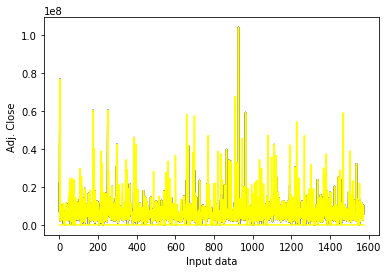

In [128]:
plt.plot(predicted_stock_test, color = 'blue')
plt.xlabel('Input data')
plt.ylabel('Adj. Close')
plt.plot(Y_test,color = "yellow")
plt.show()

In [129]:
a = reg.score(X_train,Y_train)
b = reg.score(X_test,Y_test)
print("Training data : {}, Testing data : {}".format(a,b))

Training data : 0.9999989109761728, Testing data : 0.9999986704488077


In [130]:
#Use Pandas to populate the data frame
dataframe1 = dataframe[[ 'Adj. Close', 'Adj. Volume','Volume']]
print(dataframe1)

             Adj. Close  Adj. Volume     Volume
Date                                           
1997-05-16     1.729167   14700000.0  1225000.0
1997-05-19     1.708333    6106800.0   508900.0
1997-05-20     1.635833    5467200.0   455600.0
1997-05-21     1.427500   18853200.0  1571100.0
1997-05-22     1.395833   11776800.0   981400.0
...                 ...          ...        ...
2018-03-21  1581.860000    4667291.0  4667291.0
2018-03-22  1544.100000    6177737.0  6177737.0
2018-03-23  1495.560000    7843966.0  7843966.0
2018-03-26  1555.860000    5547618.0  5547618.0
2018-03-27  1497.050000    6793279.0  6793279.0

[5248 rows x 3 columns]


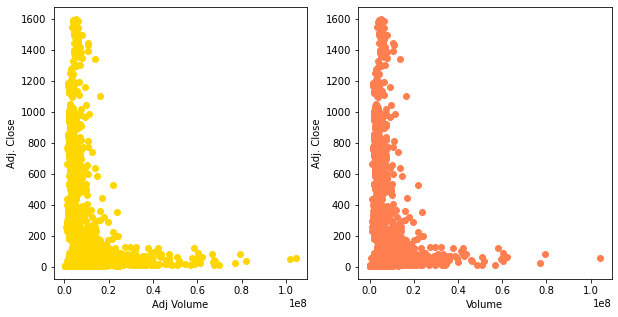

In [131]:
figure_size = (10,5)
plt.figure( figsize = figure_size )

plt.subplot(1,2,1)
plt.scatter( dataframe['Adj. Volume'], dataframe['Adj. Close'],color = 'gold')
plt.xlabel("Adj Volume")
plt.ylabel("Adj. Close") 

plt.subplot(1,2,2)
plt.scatter( dataframe['Volume'], dataframe['Adj. Close'],color = 'coral')
plt.xlabel("Volume")
plt.ylabel("Adj. Close") 

plt.show()


In [132]:
# Create X label
X1 = np.array(dataframe1.drop(['Adj. Close'], 1))
print(X1)
# Create Y label
Y1 = np.array(dataframe1.drop(['Adj. Volume','Volume'], 1))
print(Y1)

[[14700000.  1225000.]
 [ 6106800.   508900.]
 [ 5467200.   455600.]
 ...
 [ 7843966.  7843966.]
 [ 5547618.  5547618.]
 [ 6793279.  6793279.]]
[[   1.72916667]
 [   1.70833333]
 [   1.63583333]
 ...
 [1495.56      ]
 [1555.86      ]
 [1497.05      ]]


In [133]:
'''
Select algorithm based on data analysis
- Split training and testing data
- we will be using Linear regression as regression problem
- Tranining data 70%
- Testing data 30%
'''

X1_train, X1_test, Y1_train, Y1_test = train_test_split( X1, Y1, test_size = 0.3 )
print(X1_train.shape, Y1_train.shape)
print(X1_test.shape, Y1_test.shape)

(3673, 2) (3673, 1)
(1575, 2) (1575, 1)


In [134]:
# Apply Linear Regression
reg = LinearRegression()
model = reg.fit(X1_train, Y1_train)

In [135]:
#get linear regression coefficients
slope = reg.coef_[0]
intercept = reg.intercept_
print("Slope : {}, Intercept : {}".format(slope, intercept))

Slope : [-8.46473241e-06 -3.40909920e-06], Intercept : [292.18930514]


In [136]:
training_prediction = np.zeros(Y1_train.shape)
for i in range(len((X_train))):
    training_prediction[i] = (slope[0] * X1_train[i][0]) + (slope[1] * X1_train[i][1])  + intercept
print("predicted training data : {}".format(training_prediction))

predicted training data : [[227.23588403]
 [239.36144088]
 [246.31119453]
 ...
 [174.38664688]
 [196.81156527]
 [270.77532477]]


In [137]:
testing_prediction = np.zeros(Y1_test.shape)
for i in range(len((X_test))):
    testing_prediction[i] = (slope[0] * X1_test[i][0]) + (slope[1] * X1_test[i][1])  + intercept
print("predicted testing data : {}".format(testing_prediction))

predicted testing data : [[247.04586411]
 [204.2778306 ]
 [206.92450766]
 ...
 [253.23191666]
 [ 86.69365084]
 [176.33751741]]


In [138]:
a1 = reg.score(X1_train,Y1_train)
b1 = reg.score(X1_test,Y1_test)
print("Training data : {}, Testing data : {}".format(a1,b1))

Training data : 0.07795060740788995, Testing data : 0.07517728372776333
